<p>Este c&oacute;digo fue escrito por Pablo Angulo y forma parte de su curso inicial&nbsp; para la asignatura "Laboratorio" . Puedes ver la exposici&oacute;n completa en <a href="http://www.uam.es/personal_pdi/ciencias/pangulo/doc/laboratorio/b2s3.html"> en sus notas para el curso.</a> All&iacute; se expone c&oacute;mo partiendo de c&oacute;digo escrito en Python puro se puede averiguar qu&eacute; zonas del c&oacute;digo necesitan mejora y c&oacute;mo implementar esas mejoras usando Cython y numpy.</p>
<p>Con este programa se obtiene una representaci&oacute;n del conjunto de Mandelbrot, que, por definici&oacute;n, es el conjunto de n&uacute;meros complejos $c$ tales que la &oacute;rbita de $0$ mediante la iteraci&oacute;n de la funci&oacute;n $f(z)=z^2+c$, es decir el conjunto de puntos en el plano complejo</p>
<p>$$\{c,c^2+c,(c^2+c)^2+c,\dots\}$$</p>
<p>permanece acotado (es decir, hay un n&uacute;mero $R$, que puede ser muy grande y depende de $c$, tal que toda la &oacute;rbita de cero est&aacute; contenida en el c&iacute;rculo de centro cero y radio $R$). Debes analizar con cuidado el c&oacute;digo&nbsp; para averiguar c&oacute;mo funciona, entendiendo en particular el papel que juegan los par&aacute;metros que suministramos a la funci&oacute;n. Cuando a un par&aacute;metro le asignamos un valor en la definici&oacute;n, por ejemplo $int N=5000$ quiere decir que ese es el valor por defecto y no es necesario asignarlo al llamar a la funci&oacute;n.</p>
<p>El conjunto de Mandelbrot es quiz&aacute; el ejemplo m&aacute;s sencillo de conjunto fractal, y es interesante variar la funci&oacute;n que se itera cambiando la l&iacute;nea $z=z*z+c$ por otra expresi&oacute;n en funci&oacute;n de $z$ y $c$. </p>

In [2]:
def mandelbrot_sage(x0,x1,y0,y1,N=100,L=200,R=3):
    '''returns an array NxN to be plotted with matrix_plot
    '''
    m = matrix(ZZ,N,N,[0]*N**2)
    deltax = (x1-x0)/N
    deltay = (y1-y0)/N
    for j in range(N):
        for k in range(N):
            c = (x0+j*deltax)+ I*(y0+k*deltay)
            z=CC(0)
            h=0
            while (h<L and
                   z.real()**2 + z.imag()**2 < R*R):
                z=z*z+c
                h+=1
            m[j,k]=h
    return m

In [3]:
%time M = mandelbrot_sage(x0=-2.0,x1=2.0,y0=-2.0,y1=2.0)

CPU times: user 31 s, sys: 16 ms, total: 31 s
Wall time: 31 s


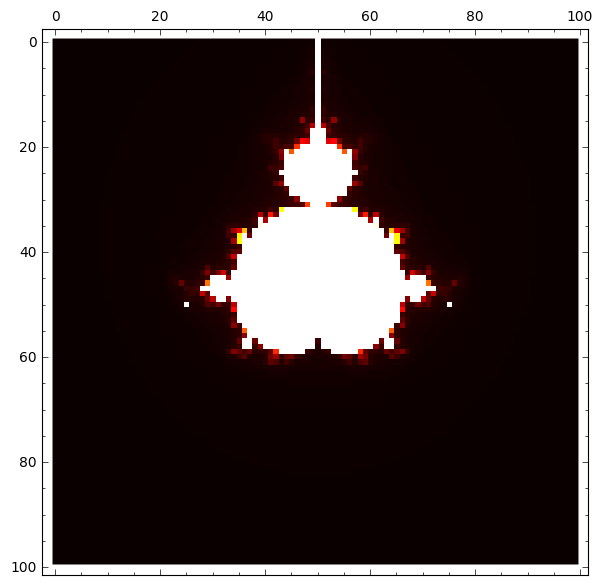

In [4]:
matrix_plot(M,cmap='hot')

Tiene el aspecto del fractal de mandelbrot, pero la resolución es muy pobre. Aumentando $N$ y $L$ se conseguiría mejor resolución, pero tarda demasiado. 

In [4]:
%%cython

import numpy as np
cimport numpy as np
cimport cython

def mandelbrot_cython(float x0,float  x1,float  y0,float  y1,
                   int N=5000, int L=500, float R=3):
    '''returns an array NxN to be plotted with matrix_plot
    '''
    cdef double complex c, z, I
    cdef float deltax, deltay, R2 = R*R
    cdef int h, j, k
    cdef np.ndarray[np.uint16_t, ndim=2] m
    m = np.zeros((N,N), dtype=np.uint16)
    I = complex(0,1)
    deltax = (x1-x0)/N
    deltay = (y1-y0)/N
    for j in range(N):
        for k in range(N):
            c = (x0+j*deltax)+ I*(y0+k*deltay)
            z=0
            h=0
            while (h<L and
                   z.real**2 + z.imag**2 < R2):
                z=z*z+c
                h+=1
            m[j,k]=h
    return m

In [5]:
%time M = mandelbrot_cython(x0=-2.0,x1=2.0,y0=-2.0,y1=2.0)

CPU times: user 5.5 s, sys: 24 ms, total: 5.53 s
Wall time: 5.53 s


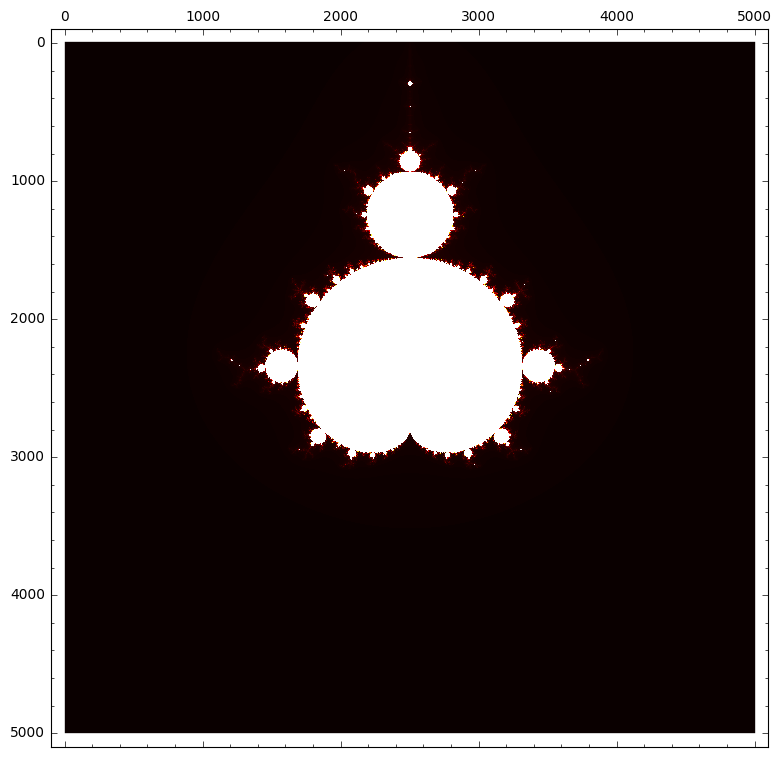

In [8]:
matrix_plot(M,cmap='hot').show(figsize=(8,8))

In [1]:
%%cython 

import numpy
cimport numpy  
cimport cython

def mandelbrot_cy2(float x0,float  y0,float side,int N=1000, int L=500, float R=3):
        cdef double complex c, z, I
        cdef float delta
        cdef int h, j, k
        cdef numpy.ndarray[numpy.uint16_t, ndim=2] m
        m = numpy.zeros((N,N), dtype=numpy.uint16)
        I = complex(0,1)
        delta = side/N
        for j in range(N):
            for k in range(N):
                c = (x0+j*delta)+ I*(y0+k*delta)
                z=0
                h=0
                while (h<L and z.real**2 + z.imag**2 < R*R):
                        z=z*z+c
                        h+=1
                m[j,k]=h
        return m

CPU times: user 308 ms, sys: 0 ns, total: 308 ms
Wall time: 305 ms


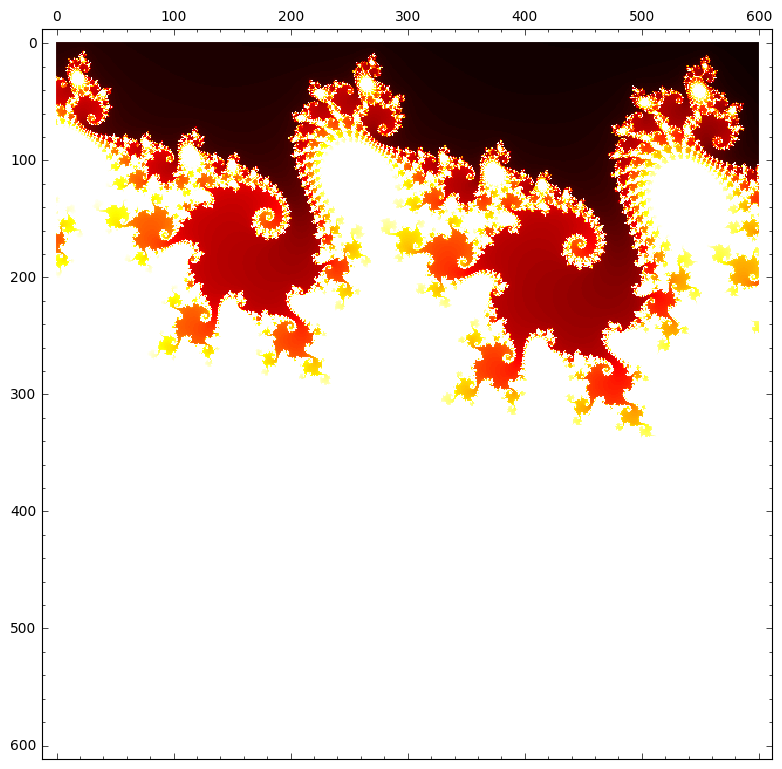

In [15]:
%time m=mandelbrot_cy2(-0.75,0.1, 0.016875,600,160)
matrix_plot(m,cmap='hot').show(figsize=(8,8))

CPU times: user 144 ms, sys: 0 ns, total: 144 ms
Wall time: 144 ms


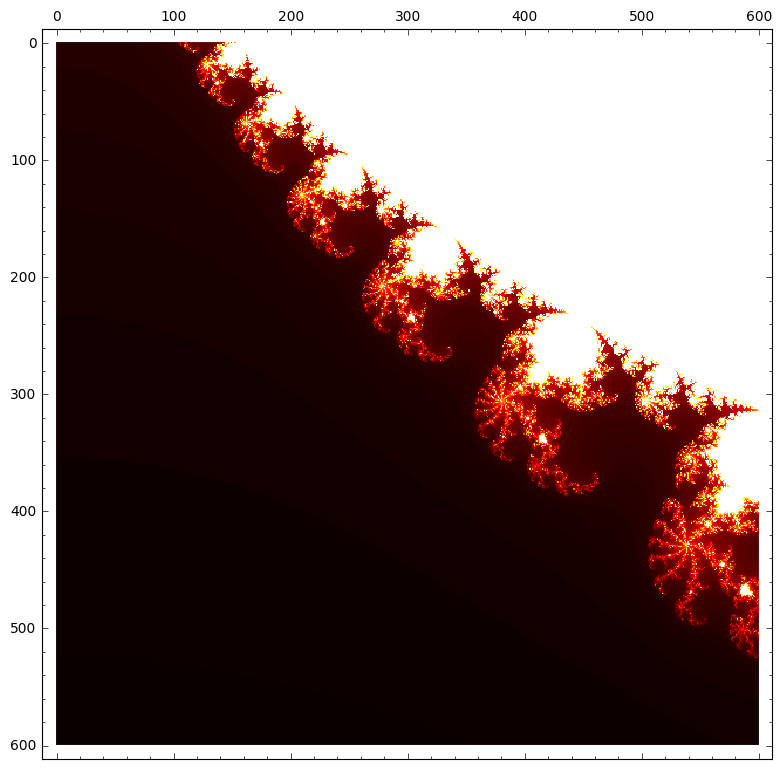

In [16]:
%time m=mandelbrot_cy2(0.3,0.0, 0.100875,600,160)
matrix_plot(m,cmap='hot').show(figsize=(8,8))

In [9]:
%%cython 

import numpy as np
cimport numpy  as np
cimport cython

def mandelbrot_cy3(float x0,float  y0,float side,int N=1000, int L=500, float R=3):
        cdef double complex c, z, I
        cdef float delta
        cdef int h, j, k
        cdef np.ndarray[np.uint16_t,ndim=2] M = np.zeros((N,N), \
        dtype=np.uint16)
        cdef np.uint16_t[:,:] MV = M
        I = complex(0,1)
        delta = side/N
        for j in range(N):
            for k in range(N):
                c = (x0+j*delta)+ I*(y0+k*delta)
                z=0
                h=0
                while (h<L and z.real**2 + z.imag**2 < R*R):
                        z=z*z+c
                        h+=1
                MV[j,k]=h
        return MV

CPU times: user 148 ms, sys: 0 ns, total: 148 ms
Wall time: 148 ms


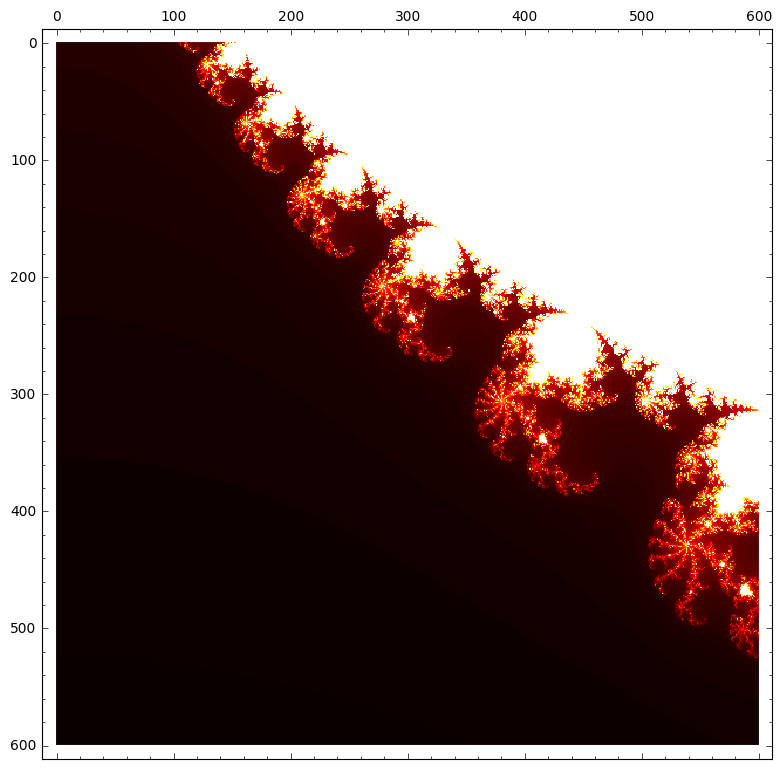

In [11]:
%time m=mandelbrot_cy3(0.3,0.0, 0.100875,600,160)
matrix_plot(m,cmap='hot').show(figsize=(8,8))

In [16]:
%time M=mandelbrot_cy2(0.3,0.0, 0.100875,600,160)
%time M=mandelbrot_cy3(0.3,0.0, 0.100875,600,160)
%time M=mandelbrot_cy2(0.3,0.0, 0.100875,1200,160)
%time M=mandelbrot_cy3(0.3,0.0, 0.100875,1200,160)
%time M=mandelbrot_cy2(0.3,0.0, 0.100875,2400,160)
%time M=mandelbrot_cy3(0.3,0.0, 0.100875,2400,160)

CPU times: user 144 ms, sys: 0 ns, total: 144 ms
Wall time: 145 ms
CPU times: user 104 ms, sys: 0 ns, total: 104 ms
Wall time: 105 ms
CPU times: user 416 ms, sys: 0 ns, total: 416 ms
Wall time: 415 ms
CPU times: user 376 ms, sys: 0 ns, total: 376 ms
Wall time: 376 ms
CPU times: user 1.27 s, sys: 0 ns, total: 1.27 s
Wall time: 1.27 s
CPU times: user 1.27 s, sys: 0 ns, total: 1.27 s
Wall time: 1.27 s


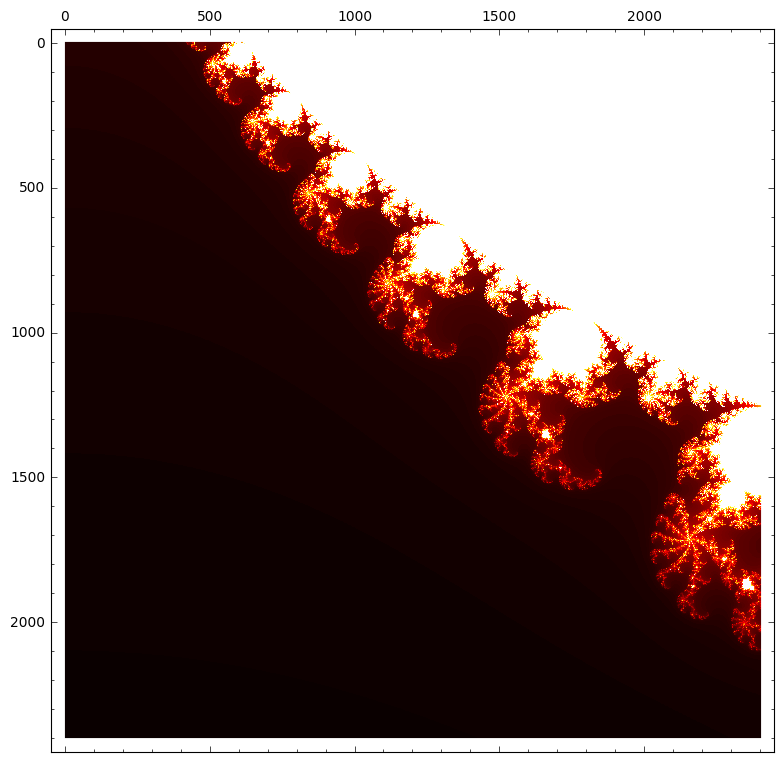

In [17]:
matrix_plot(M,cmap='hot').show(figsize=(8,8))